In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv("8-fraud_detection.csv")
# ya bankalar ya da ödeme sistemleri tarafından kullanılan bilgidir.
# transaction = işlem
# fraud = dolandırıcılık

In [24]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [25]:
df["is_fraud"].unique()

array([0, 1], dtype=int64)

In [26]:
df["is_fraud"].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [27]:
# imbalanced dataset

In [28]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

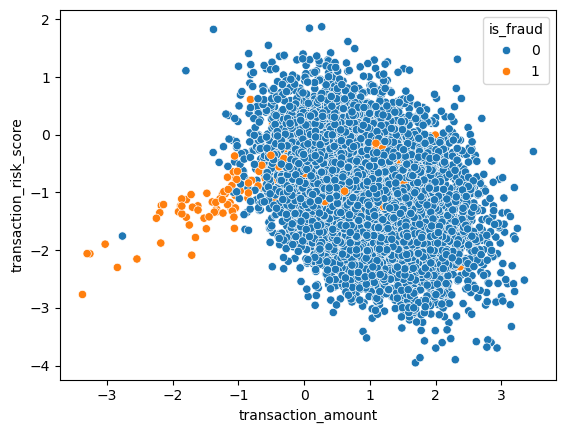

In [29]:
sns.scatterplot(x= X["transaction_amount"], y = X["transaction_risk_score"], hue= y)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
penalty = ["l1", "l2", "elasticnet"]
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga", "newton-cholesky"]
class_weight = [{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [34]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [62]:
params = dict(penalty = penalty, C = c_values, solver = solver, class_weight = class_weight)

In [63]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [64]:
cv= StratifiedKFold()

In [65]:
grid = GridSearchCV(estimator = model, param_grid=params, scoring = "accuracy", cv=cv)

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             scoring='accuracy')

In [68]:
y_pred = grid.predict(X_test)

In [69]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
print("score: ", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print("confusion_matrix: \n ", confusion_matrix(y_pred, y_test))

score:  0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2481
           1       0.42      0.84      0.56        19

    accuracy                           0.99      2500
   macro avg       0.71      0.92      0.78      2500
weighted avg       0.99      0.99      0.99      2500

confusion_matrix: 
  [[2459   22]
 [   3   16]]


In [72]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [73]:
grid.best_score_

0.9884000000000001

In [74]:
# roc, auc

The ROC Curve is a graphical representation of a classification model’s performance across different threshold values. It plots the True Positive Rate (Recall) on the Y-axis against the False Positive Rate (1 - Specificity) on the X-axis. • A model that perfectly distinguishes between classes has a curve that reaches the top-left corner. • The closer the curve is to the top-left, the better the model. • The area under the ROC curve (AUC) quantifies this performance: • AUC = 1 → perfect classifier • AUC = 0.5 → random guessing

ROC is especially useful for imbalanced datasets, as it evaluates the model independent of class distribution or threshold.

In [75]:
# auc =  roc curl integrali roc altında kalan alan ne kadar büyükse o kadar iyi oluyor. imbalanc datada çizdirmek iyi oluyor.

In [76]:
model_prob = grid.predict_proba(X_test)

In [77]:
model_prob

array([[0.99586436, 0.00413564],
       [0.85287009, 0.14712991],
       [0.952308  , 0.047692  ],
       ...,
       [0.98898975, 0.01101025],
       [0.98454137, 0.01545863],
       [0.99758734, 0.00241266]])

In [78]:
model_prob = model_prob[:,1] # probabilities for the positivise (fraud) class

In [79]:
model_prob

array([0.00413564, 0.14712991, 0.047692  , ..., 0.01101025, 0.01545863,
       0.00241266])

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score

In [81]:
model_auc = roc_auc_score(y_test, model_prob) # auc bize 0-1 arasında bişey veriyo 1 e ne kadar yakınsa o kadar iyi

In [82]:
model_auc

0.7392898371029116

In [83]:
# model false positive rate
# model true positive rate

In [84]:
model_fpr, model_tpr,thresholds = roc_curve(y_test, model_prob)

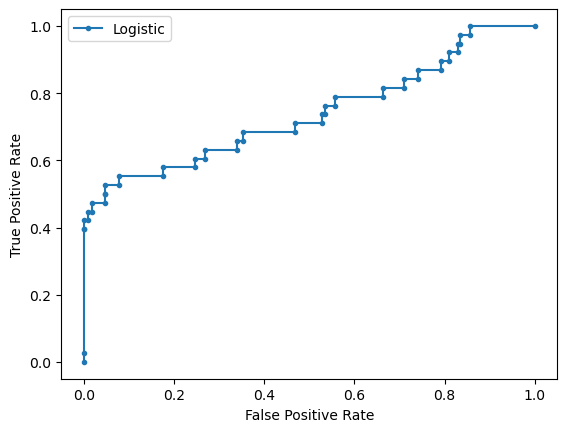

In [85]:
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

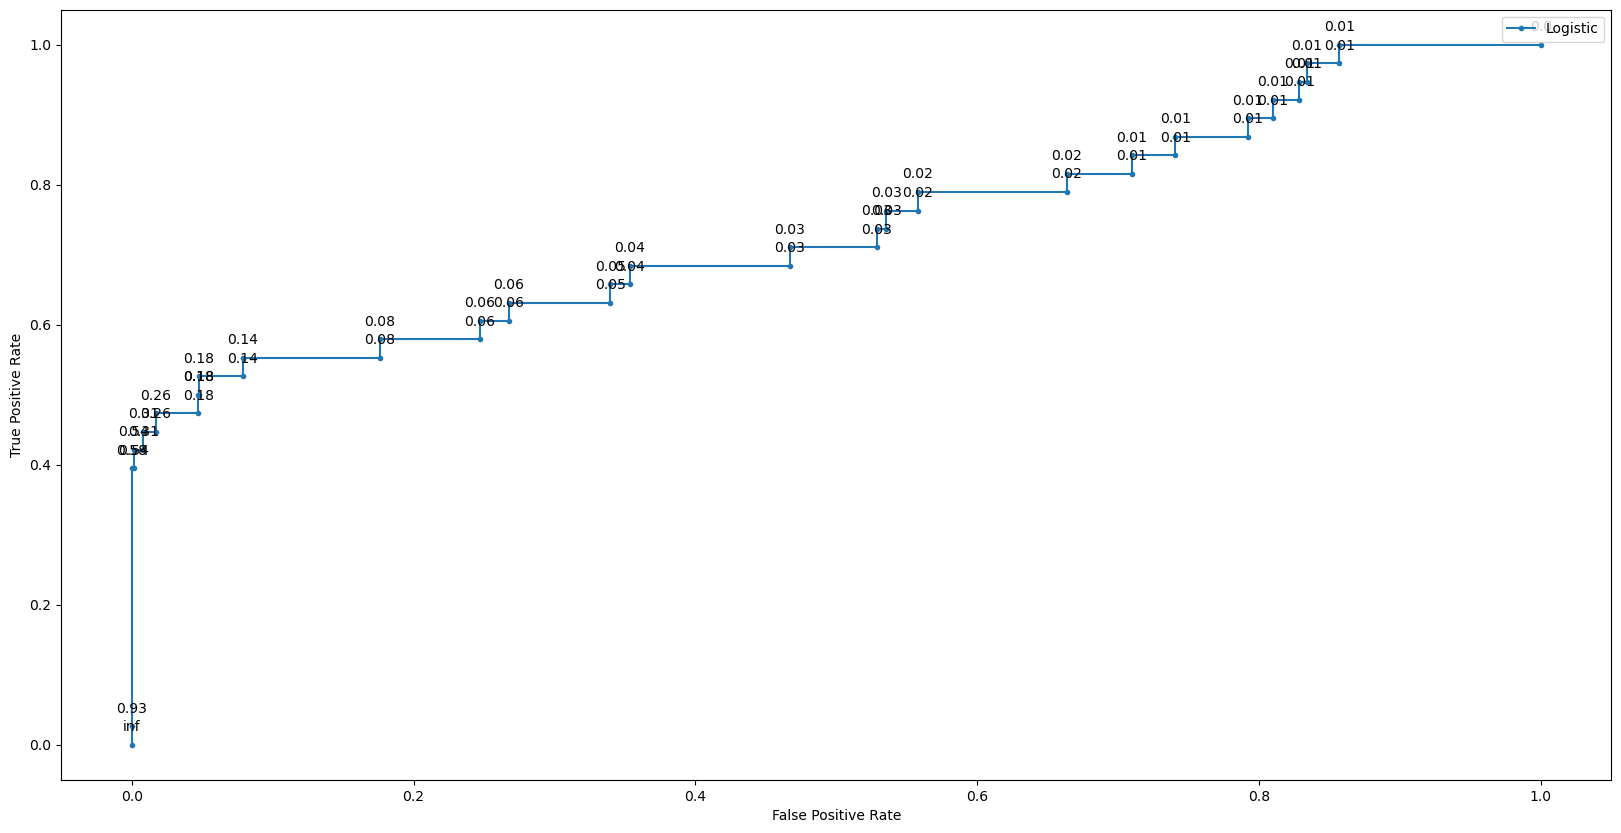

In [86]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot ROC curve
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# Labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
plt.show()

In [87]:
custom_threshold = 0.5

y_pred_custom = (model_prob >= custom_threshold).astype(int)

print(confusion_matrix(y_pred_custom, y_test))
print(classification_report(y_pred_custom, y_test))

[[2459   22]
 [   3   16]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2481
           1       0.42      0.84      0.56        19

    accuracy                           0.99      2500
   macro avg       0.71      0.92      0.78      2500
weighted avg       0.99      0.99      0.99      2500



In [88]:
y_pred_custom

array([0, 0, 0, ..., 0, 0, 0])